In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons

In [47]:
# X,Y = make_blobs(n_samples=500,centers=2, n_features=2, random_state=10)
X,Y = make_moons(n_samples=1000,shuffle=True,noise= 0.2, random_state=1)
print(X.shape,Y.shape)

(1000, 2) (1000,)


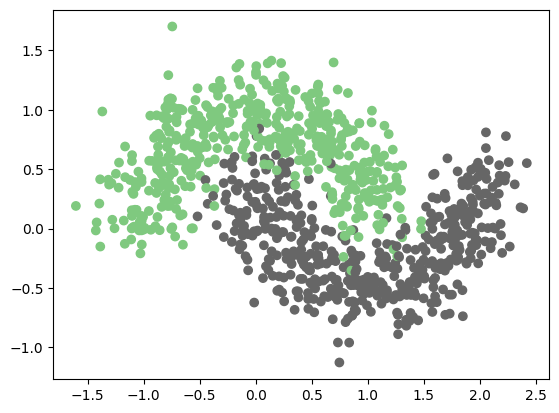

In [48]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Model and Helper Functions

In [49]:
def sigmoid(z):
  return 1.0/(1+np.exp(-z))
z = np.array([1,2,3,4,5])
sigmoid(z) #broadcasting

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

In [50]:
def predict(X,weights):
  # X -> m x (n+1) matrix  W -> n x 1 vector
  z = np.dot(X,weights)
  predictions = sigmoid(z)
  return predictions

def loss(X,Y,weights):
  Y_ = predict(X,weights)
  cost = np.mean(-Y*np.log(Y_) - (1-Y)*(1-np.log(Y_)))
  return cost

def update(X,Y,weights,learning_rate):
  Y_ = predict(X,weights)
  dw = np.dot(X.T,Y_ - Y)

  m = X.shape[0]
  weights = weights - learning_rate*dw/(float(m))
  return weights

def train(X,Y,learning_rate,maxEpochs=100):
  ones = np.ones((X.shape[0],1))
  X = np.hstack((ones,X))

  weights = np.zeros(X.shape[1])

  for epoch in range(maxEpochs):
    weights = update(X,Y,weights,learning_rate)

    if epoch%10 == 0:
      l = loss(X,Y,weights)
      print("Epoch Number", str(epoch))
      print("Epoch Number %d Loss %.4f"%(epoch,l))
  return weights

## Visualisation and Predictions

In [51]:
weights = train(X,Y,learning_rate=0.01,maxEpochs=500)

Epoch Number 0
Epoch Number 0 Loss -0.5010
Epoch Number 10
Epoch Number 10 Loss -0.5103
Epoch Number 20
Epoch Number 20 Loss -0.5194
Epoch Number 30
Epoch Number 30 Loss -0.5283
Epoch Number 40
Epoch Number 40 Loss -0.5369
Epoch Number 50
Epoch Number 50 Loss -0.5453
Epoch Number 60
Epoch Number 60 Loss -0.5535
Epoch Number 70
Epoch Number 70 Loss -0.5615
Epoch Number 80
Epoch Number 80 Loss -0.5693
Epoch Number 90
Epoch Number 90 Loss -0.5770
Epoch Number 100
Epoch Number 100 Loss -0.5844
Epoch Number 110
Epoch Number 110 Loss -0.5917
Epoch Number 120
Epoch Number 120 Loss -0.5989
Epoch Number 130
Epoch Number 130 Loss -0.6059
Epoch Number 140
Epoch Number 140 Loss -0.6127
Epoch Number 150
Epoch Number 150 Loss -0.6195
Epoch Number 160
Epoch Number 160 Loss -0.6261
Epoch Number 170
Epoch Number 170 Loss -0.6325
Epoch Number 180
Epoch Number 180 Loss -0.6389
Epoch Number 190
Epoch Number 190 Loss -0.6451
Epoch Number 200
Epoch Number 200 Loss -0.6513
Epoch Number 210
Epoch Number 210 L

In [52]:
def get_preds(X_test,weights,labels=True):
  if X_test[1] != weights.shape[0]:
    ones = np.ones(X_test.shape[0],1)
    X_test = np.hstack(ones,X_test)
  probs = predict(X_test,weights)
  if not labels:
    return probs
  else:
    labels = np.zeros(probs.shape)
    labels[probs >= 0.5] = 1
    return labels

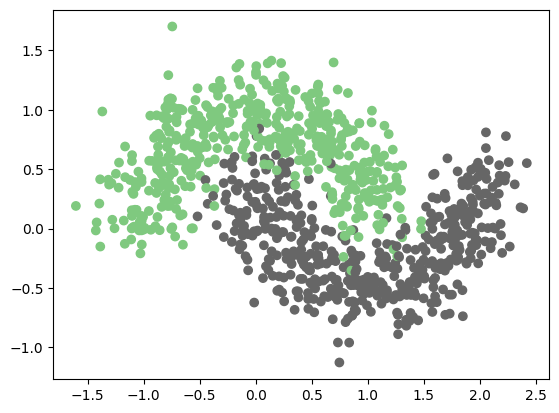

In [53]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [54]:
# x1 = np.linspace(-2,10,10)
x1 = np.linspace(-2,2,10)
print(x1)
x2 = -(weights[0] + weights[1]*x1)/weights[2]
print(x2)

[-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]
[-1.99438017 -1.57605933 -1.15773849 -0.73941765 -0.32109682  0.09722402
  0.51554486  0.9338657   1.35218653  1.77050737]


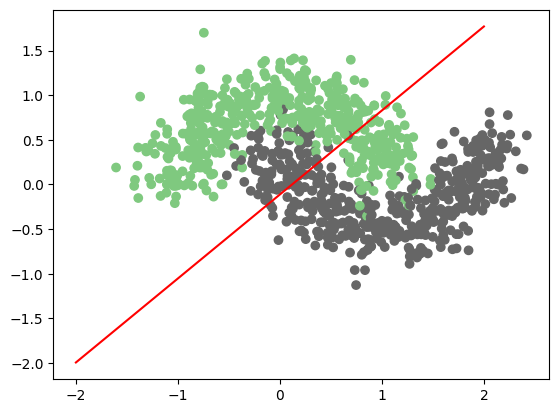

In [55]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c="red")
plt.show()